In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score,train_test_split, KFold, GroupKFold

In [2]:
path = 'dados/procucao_gado_MS.csv'
df = pd.read_csv(path, sep=';')

In [3]:
df.sample(3)

,tipificacao_1,tipificacao_2,tipificacao_3,maturidade,acabamento,peso,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,...,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,ano,categoria,classificacao,longitude,latitude,mes
231105,1,0,0,2,2,331.4,26.0,0,0,0,...,0.3793,0.3220,0.4224,0.4073,2017,4,1,-51.418940,-20.366740,11
673482,0,1,0,2,2,241.0,21.0,0,0,0,...,0.5161,0.6452,0.5246,0.3525,2018,4,1,-55.790616,-20.474654,9
282929,1,0,0,4,3,290.6,21.0,0,0,0,...,0.2069,0.2838,0.3621,0.3883,2017,6,0,-52.036300,-21.247120,12


In [4]:
print('A base de dados apresenta {} registros e {} características.'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 960939 registros e 53 características.


In [6]:
y = df['categoria']
# Retirar a variável alvo e as variáveis obtidas após o abate 
X = df.drop(['peso','acabamento', 'maturidade', 'classificacao','categoria', 'ano'],axis=1)

In [7]:
SEED = 42
gfolds = GroupKFold(n_splits=10)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=SEED)

In [26]:
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

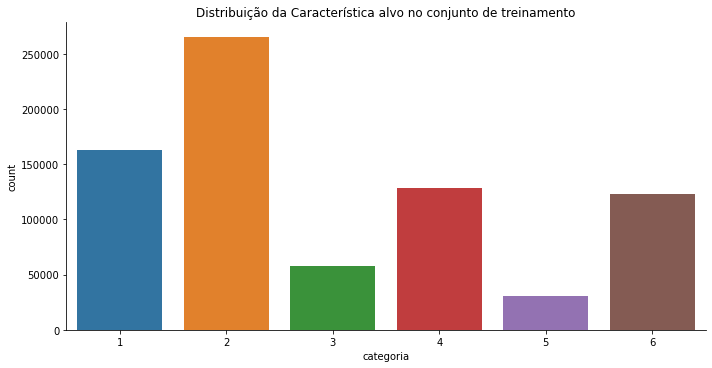

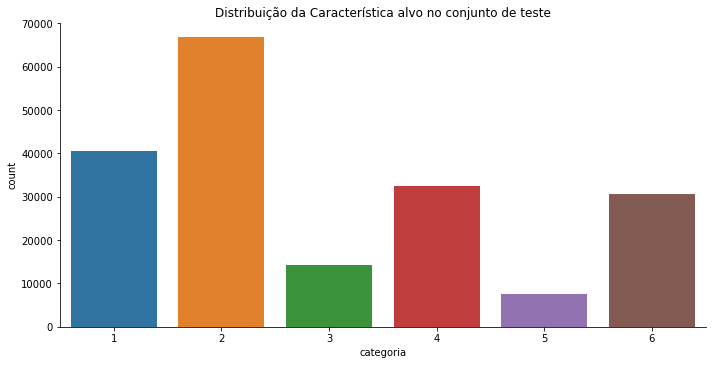

In [29]:
sns.catplot(x = "categoria", data = df_y_train, 
            kind="count", 
            aspect=2).set(title='Distribuição da Característica alvo no conjunto de treinamento')
sns.catplot(x = "categoria", data = df_y_test, 
            kind="count", 
            aspect=2).set(title='Distribuição da Característica alvo no conjunto de teste')

In [33]:
df_train = X_train.join(df_y_train)

In [35]:
df_train.to_csv("procucao_gado_MS_train", sep=';', index=False)

In [34]:
df_test = X_test.join(df_y_test)

In [36]:
df_test.to_csv("procucao_gado_MS_test", sep=';', index=False)

In [37]:
X_train.head(10)

,tipificacao_1,tipificacao_2,tipificacao_3,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,ilp,ilpf,ifp,...,med12m_prer_soja,med12m_prer_milho,med12m_prer_boi,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,longitude,latitude,mes
243656,1,0,0,30.0,0,1,0,0,1,0,...,71.03,30.31,138.22,0.5000,0.6538,0.7500,0.6182,-53.761680,-20.443680,11
901467,1,0,0,26.0,0,0,0,0,0,0,...,83.92,38.09,144.57,0.5161,0.5699,0.7213,0.6685,-55.281910,-20.692310,12
255725,0,1,0,21.0,0,0,0,0,0,0,...,71.10,30.32,138.33,0.5484,0.6129,0.7104,0.6460,-52.425437,-21.715288,12
663154,1,0,0,21.0,0,1,0,1,0,0,...,79.61,36.44,143.00,0.8387,0.8495,0.7923,0.6831,-54.865560,-20.442310,9
770948,1,0,0,30.0,0,1,0,1,0,0,...,82.62,37.62,143.89,0.5161,0.7742,0.8087,0.6514,-53.351570,-22.248760,10
722346,1,0,0,30.0,0,1,0,1,0,0,...,81.54,37.27,143.51,0.7667,0.8652,0.9143,0.8023,-54.564569,-19.395521,10
640139,1,0,0,21.0,0,0,0,0,0,0,...,79.11,36.14,142.90,0.8387,0.7849,0.6066,0.4388,-52.036300,-21.247120,8
618781,1,0,0,21.0,0,0,0,0,0,0,...,78.47,35.71,142.66,0.8387,0.7742,0.5574,0.4198,-52.036300,-21.247120,8
882243,0,1,0,26.0,0,0,0,0,0,0,...,83.75,37.96,144.49,0.4839,0.5591,0.7049,0.6749,-54.892770,-19.961860,11
453805,0,0,1,21.0,0,0,0,0,0,0,...,73.72,31.88,139.33,0.8710,0.7097,0.6175,0.6530,-54.830010,-19.831220,5


In [38]:
y_train.head(10)

243656    1
901467    2
255725    5
663154    2
770948    4
722346    2
640139    6
618781    2
882243    3
453805    6
Name: categoria, dtype: int64